# parse the debian med metadata provided by Steffen in the local edam.json file

In [1]:
import json
debian_med_metadata = json.load(open('edam.json'))
print(len(debian_med_metadata))
for entry in debian_med_metadata:
    print(entry['package'],entry['bio.tools'], entry['doi'])
biotools_linked_packages = [entry for entry in debian_med_metadata if entry['bio.tools'] is not None]
print(len(biotools_linked_packages))
print(len([entry['doi'] for entry in debian_med_metadata]))

872
abacas None 10.1093/bioinformatics/btp347
abyss ABySS 10.1101/gr.089532.108
acacia None 10.1038/nmeth.1990
acedb-other dotter 10.1109/5992.764215
adapterremoval None 10.1186/s13104-016-1900-2
adun.app None 10.1002/jcc.20312
adun-core None 10.1002/jcc.20312
aegean None 10.1186/1471-2105-13-187
aevol None None
alien-hunter None 10.1093/bioinformatics/btl369
alter-sequence-alignment alter 10.1093/nar/gkq321
altree None 10.1093/bioinformatics/btl131
amap-align None 10.1093/bioinformatics/btl311
amos-assembler amos 10.1093/bib/bbr074
hawkeye amos 10.1093/bib/bbr074
ampliconnoise pyronoise 10.1186/1471-2105-12-38
andi andi 10.1093/bioinformatics/btu815
anfo None None
apollo ApolloGenAnnotCuratTool 10.1186/gb-2002-3-12-research0082
aragorn None 10.1093/nar/gkh152
arb None None
arden None 10.1093/bioinformatics/btt255
ariba None 10.1099/mgen.0.000131
artemis artemis 10.1093/bioinformatics/btr703
artfastqgenerator None 10.1371/journal.pone.0049110
art-nextgen-simulation-tools None 10.1093/b

ssake ssake 10.1093/bioinformatics/btl629
libssm-dev None 10.1107/S0907444904026460
sspace sspace 10.1093/bioinformatics/btq683
stacks Stacks 10.1111/mec.12354
staden staden 10.1093/bioinformatics/btq268
libstaden-read-dev None None
staden-io-lib-utils None None
strap None None
strap-base None None
subread subread None
suitename None 10.1261/rna.657708
sumaclust None None
sumatra krona None
surankco None 10.1186/s12859-015-0644-7
swarm swarm https://doi.org/10.7717/peerj.1420
sweed None 10.1093/molbev/mst112
libswiss-perl None None
tab2mage None None
tacg None 10.1186/1471-2105-3-8
tantan None 10.1093/nar/gkq1212
t-coffee None 10.1006/jmbi.2000.4042
theseus None 10.1093/bioinformatics/btl332
tide None 10.1021/pr101196n
tigr-glimmer glimmer 10.1093/nar/26.2.544
tigr-glimmer-mg None 10.1093/nar/gkr1067
tm-align None 10.1093/nar/gki524
tn-seqexplorer None 10.1371/journal.pone.0126070
tnseq-transit TRANSIT 10.1371/journal.pcbi.1004401
toil None 10.1038/nbt.3772
tophat tophat 10.1093/bioinf

# retrieve the bio.tools metadata and store them in a local biotools.json file

In [2]:
import requests
biotools_list = []
next_biotools_page = '?page=1'
print('retrieving the bio.tools data, please wait...')
while next_biotools_page is not None:
    page = requests.get('https://bio.tools/api/tool/?format=json&' + next_biotools_page[1:]).json()
    biotools_list += page['list']
    next_biotools_page = page.get('next',None)
json.dump(biotools_list,open('biotools.json','w'))
print('done!')

retrieving the bio.tools data, please wait...


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

# create dataframes to store these data

In [4]:
import pandas
from pandas.io.json import json_normalize
biotools_df = json_normalize(biotools_list)
# lowercase version of bio.tools ID in bio.tools dataframe
biotools_df['bt_id_lc'] = biotools_df['biotoolsID'].str.lower()
# lowercase version of debian ID in debian dataframe
debian_df = pandas.read_json('edam.json', orient='values')
debian_df['db_id_lc'] = debian_df['bio.tools'].str.lower()
merged_df = biotools_df.merge(debian_df, how='right', left_on='bt_id_lc', right_on='db_id_lc', suffixes=('_biotools', '_debian'))
print(merged_df.columns)
#merged_df = merged_df[['bio.tools','package','doi','publication']]
merged_df = merged_df[['bt_id_lc', 'db_id_lc', 'bio.tools','doi','publication','package','biotoolsID']]
print(merged_df[merged_df.db_id_lc.notnull()][merged_df.biotoolsID.isnull()])
print(merged_df[merged_df.db_id_lc.notnull()][merged_df.biotoolsID.isnull()].shape[0])


Index(['accessibility', 'additionDate', 'biotoolsCURIE', 'biotoolsID',
       'collectionID', 'cost', 'credit', 'description_biotools',
       'documentation', 'download', 'editPermission.authors',
       'editPermission.type', 'elixirNode', 'elixirPlatform', 'elixir_badge',
       'function', 'homepage_biotools', 'homepage_status', 'language',
       'lastUpdate', 'license', 'link', 'maturity', 'name', 'operatingSystem',
       'otherID', 'owner', 'publication', 'toolType', 'topic', 'validated',
       'version_biotools', 'bt_id_lc', 'OMICtools', 'RRID', 'SEQwiki',
       'SciCrunch', 'bio.tools', 'biology', 'component', 'description_debian',
       'distribution', 'doi', 'edam_scopes', 'fields', 'homepage_debian',
       'interface', 'long_description', 'package', 'popcon', 'release',
       'source', 'topics', 'use', 'version_debian', 'db_id_lc'],
      dtype='object')
    bt_id_lc                  db_id_lc                 bio.tools  \
831      NaN   apollogenannotcurattool   Apollo

/home/hmenager/debian-med-links-analysis/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/home/hmenager/debian-med-links-analysis/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


# print the number of entries in debian with a bio.tools ID and the number that have a corresponding bio.tools entry based on reference publications

In [9]:
# find potential debian med entries which have not yet been mapped to bio.tools entries
debian_df_bydoi = debian_df.set_index('doi')
intersection_id = set()
intersection_doi = set()
debian_new_biotools_links = []
entries = []
for idx, row in biotools_df.iterrows():
    if row['bt_id_lc'] in debian_df['db_id_lc'].values:
        intersection_id.add(row['bt_id_lc'])
    else:
        for pub in row['publication']:
            if pub['doi'] and pub['type']=='Primary' and pub['doi'] in debian_df_bydoi.index and debian_df_bydoi.loc[pub['doi']]['db_id_lc'] is None:
                intersection_doi.add(row['bt_id_lc'])
                debian_new_biotools_links.append({'bio.tools': row['bt_id_lc'], 'debian': debian_df_bydoi.loc[pub['doi']]['package']})
print(len(intersection_id), len(intersection_doi))
print('bio.tools\tdebian')
for entry in debian_new_biotools_links:
    print(entry['bio.tools'] + "\t" + entry['debian'])

226 33
bio.tools	debian
inspect_ms	inspect
massxpert	msxpertsuite
htseqcount	python-htseq
htseq	python-htseq
spp	r-other-hms-dbmi-spp
pyfaidx	python3-pyfaidx
mach	mach-haplotyper
hisat2	hisat2
sparta	sparta
rapmap	rapmap
seqcluster	python3-seqcluster
biocgenerics	r-bioc-biocgenerics
variantannotation	r-bioc-variantannotation
biomart	r-bioc-biomart
bioconductor	r-bioc-biocgenerics
shortread	r-bioc-shortread
sigma_align	sigma-align
pscan-chip	pscan-chip
rainbow	bio-rainbow
sibelia	sibelia
biojava	libbiojava-java
pscanchip	pscan-chip
summarizedexperiment	r-bioc-biocgenerics
cnvkit	cnvkit
mcl	mcl
crux	crux-toolkit
tcoffee	t-coffee
mview_api_ebi	mview
t-coffee_api_ebi	t-coffee
mafft_api	mafft
mview_ebi	mview
t-coffee	t-coffee
isomirs	python3-seqcluster


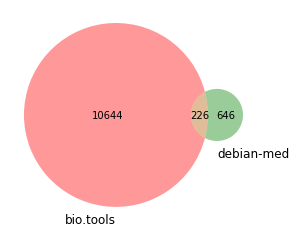

In [6]:
%matplotlib inline
from matplotlib_venn import venn2
venn2(subsets=(len(biotools_df)-len(intersection_id), len(debian_df)-len(intersection_id), len(intersection_id)), set_labels = ('bio.tools', 'debian-med', 'overlap'))

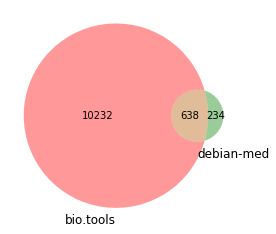

In [7]:
venn2(subsets=(len(biotools_df)-(len(intersection_id)+len(intersection_doi)), len(debian_df)-(len(intersection_id)+len(intersection_doi)), len(intersection_id)+len(intersection_doi)), set_labels = ('bio.tools', 'debian-med', 'overlap'))


In [23]:
print(debian_df.columns)
mapping = debian_df[debian_df.db_id_lc.notnull()][['db_id_lc','package']]
mapping.rename(columns={'db_id_lc':'bio.tools', 'package':'debian package'}, in_place=True)
mapping.to_csv('debian-biotools.csv', index=False)

Index(['OMICtools', 'RRID', 'SEQwiki', 'SciCrunch', 'bio.tools', 'biology',
       'component', 'description', 'distribution', 'doi', 'edam_scopes',
       'fields', 'homepage', 'interface', 'long_description', 'package',
       'popcon', 'release', 'source', 'topics', 'use', 'version', 'db_id_lc'],
      dtype='object')


TypeError: rename() got an unexpected keyword argument "in_place"